In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv
/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv


# Read Csv & EDA 

In [2]:
df_20 = pd.read_csv("/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv")
df_80 = pd.read_csv("/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv")

In [3]:
df_80.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
df_80.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df_80.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
Number vmail messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
Total eve charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
Total night minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


Take note of them : Churn - Total day charge  , Churn - Customer service calls

In [7]:
df_80.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [8]:
df_80["Customer service calls"].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [9]:
df_80.iloc[2656:2659]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2656,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
2657,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True
2658,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True


In [10]:
df_80[["Total day minutes","Total day calls","Total day charge","Churn"]].groupby(["Churn"],as_index = True).mean().sort_values(by="Churn", ascending = False)

,Total day minutes,Total day calls,Total day charge
Churn,,,
True,205.181186,101.195876,34.881340
False,175.104346,100.159350,29.768266


In [11]:
df_80[["Total eve minutes","Total eve calls","Total eve charge","Churn"]].groupby(["Churn"],as_index = True).mean().sort_values(by="Churn", ascending = False)

,Total eve minutes,Total eve calls,Total eve charge
Churn,,,
True,209.385309,99.948454,17.797861
False,198.853380,100.036435,16.902809


In [12]:
df_80[["Total night minutes","Total night calls","Total night charge","Churn"]].groupby(["Churn"],as_index = True).mean().sort_values(by="Churn", ascending = False)

,Total night minutes,Total night calls,Total night charge
Churn,,,
True,205.307216,100.682990,9.238892
False,200.464091,100.007902,9.020975


In [13]:
df_80[["Total intl minutes","Total intl calls","Total intl charge","Churn"]].groupby(["Churn"],as_index = True).mean().sort_values(by="Churn", ascending = False)

,Total intl minutes,Total intl calls,Total intl charge
Churn,,,
True,10.81933,4.051546,2.921727
False,10.13784,4.538191,2.737709


In [14]:
df_80[["Customer service calls","Churn"]].groupby(["Churn"],as_index = True).mean().sort_values(by="Churn", ascending = False)

,Customer service calls
Churn,
True,2.206186
False,1.453029


In [15]:
df_80["International plan"].value_counts()


No     2396
Yes     270
Name: International plan, dtype: int64

In [16]:
df_80["Voice mail plan"].value_counts()

No     1933
Yes     733
Name: Voice mail plan, dtype: int64

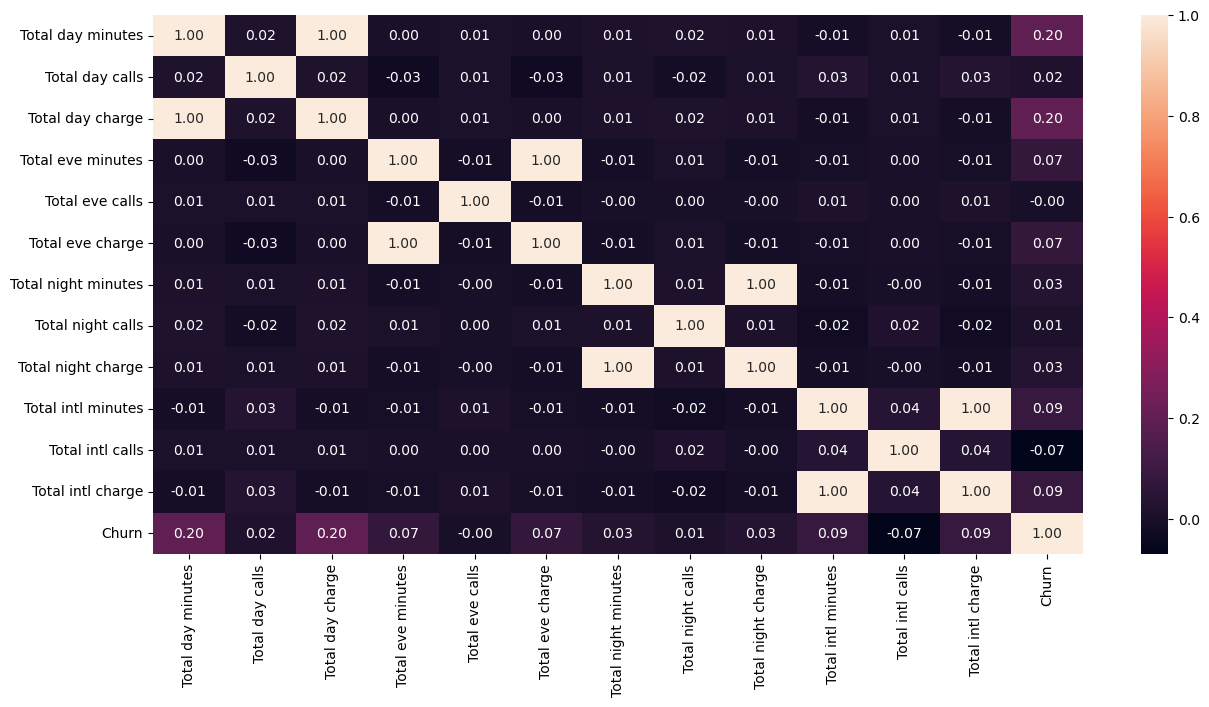

In [17]:
liste = ["Total day minutes","Total day calls","Total day charge","Total eve minutes","Total eve calls","Total eve charge","Total night minutes","Total night calls","Total night charge","Total intl minutes","Total intl calls","Total intl charge","Churn"]
plt.figure(figsize = (15,7))
sns.heatmap(df_80[liste].corr(), annot  = True , fmt = ".2f")
plt.show()

# Convert Data Types

In [18]:
df_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [19]:
# Yes/no convert to 1/0
convert = lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None)

# Boolean convert to integer
df_80['Churn'] = df_80['Churn'].astype('int64')

# Object convert to 1/0
df_80['International plan'] = df_80['International plan'].apply(convert)
df_80['Voice mail plan'] = df_80['Voice mail plan'].apply(convert)

In [20]:
df_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

# Logistic Regression

## Training

In [21]:
x = df_80.drop(columns = ["Churn","State"]).values
y = df_80["Churn"].values
 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)

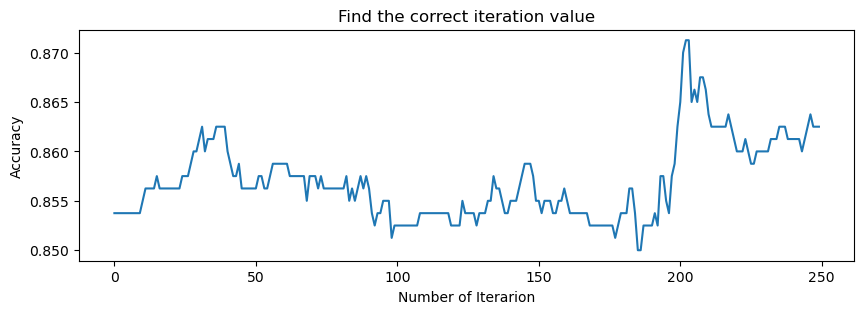

Accuracy :  0.87125


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")

score = []
i = 0
while(i < 250):
    model = LogisticRegression(max_iter = i,solver="lbfgs")
    result = model.fit(x_train,y_train)
    prediction_test = model.predict(x_test)
    score.append(metrics.accuracy_score(y_test,prediction_test))
    i += 1
plt.figure(figsize = (10,3))    
plt.plot(score)
plt.title("Find the correct iteration value")
plt.xlabel("Number of Iterarion")
plt.ylabel("Accuracy")
plt.show()    
print("Accuracy : ",max(score))

## Predict

In [23]:
convert2 = lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None)

# Boolean convert to integer
df_20['Churn'] = df_20['Churn'].astype('int64')

# Object convert to 1/0
df_20['International plan'] = df_20['International plan'].apply(convert2)
df_20['Voice mail plan'] = df_20['Voice mail plan'].apply(convert2)

In [24]:
x2 = df_20.drop(columns = ["Churn","State"]).values
y2 = df_20["Churn"].values 

In [25]:
prediction_test2 = model.predict(x2)
print("Accuracy: %",round(metrics.accuracy_score(y2,prediction_test2)*100,2))

Accuracy: % 85.46
